# Welcome to AI Camp XGBoost Workshop!
####    In this workshop, we will be using XGBoost for a classifcation problem.

# 1. Importing Libraries

In [ ]:
import pandas as pd # data processing,one-hot-encoding
import xgboost as xgb # XGBoost stuff
import matplotlib.pyplot as plt # plotting
from sklearn.model_selection import train_test_split # split data into train and test sets
from sklearn.model_selection import GridSearchCV # find optimal parameters
from sklearn.metrics import confusion_matrix # confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay # plot confusion matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score # evaluation metrics

# 2. Importing Data
#### A Telecom comapany gave us a dataset to predict whether a customer will churn or not. We have to predict the probability of churn for each customer. The dataset contains 7000 rows and 33 columns. The "Churn Value" column is the target variable. The dataset contains both numerical and categorical variables.  

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
df.shape

(7043, 33)

# 3. Data Preprocessing

## 3.1. Dropping the columns which are not required for prediction

In [ ]:
df = df.drop(['Churn Label','Churn Score','Churn Reason','CLTV'],axis=1)

In [ ]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [ ]:
print(df['Count'].unique())

[1]


In [ ]:
print(df['State'].unique())

['California']


In [ ]:
print(df['Country'].unique())

['United States']


In [ ]:
print(df['City'].unique())

['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']


In [ ]:
df = df.drop(['Country','State','Count','CustomerID' , 'Lat Long'],axis=1)

In [ ]:
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


## 3.2. Identifying Missing Values:

In [ ]:
df.dtypes

City                  object
Zip Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Value            int64
dtype: object

In [ ]:
print(df['Phone Service'].unique())

['Yes' 'No']


In [ ]:
print(df['Gender'].unique())

['Male' 'Female']


In [ ]:
print(df['Total Charges'].unique())

['108.15' '151.65' '820.5' ... '7362.9' '346.45' '6844.5']


In [ ]:
# df['Total Charges'] = pd.to_numeric(df['Total Charges'])

In [ ]:
len(df[df['Total Charges'] == " "])

11

In [ ]:
df.loc[df['Total Charges'] == " "]

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
2234,San Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,San Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,Los Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,Sun City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,Ben Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,La Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [ ]:
df.loc[df['Total Charges'] == " ", 'Total Charges'] = 0

In [ ]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'])

In [ ]:
len(df[df['Total Charges'] == " "])

0

In [ ]:
df['Total Charges'].dtypes

dtype('float64')

## 3.3. Splitting the dependent and independent variables:

In [ ]:
X = df.drop(['Churn Value'],axis=1)
X.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30


In [ ]:
y = df['Churn Value']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn Value, dtype: int64

## 3.4. One-Hot-Encoding Categorical Variables:

In [ ]:
X.dtypes

City                  object
Zip Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
dtype: object

In [ ]:
X['Payment Method'].unique()

array(['Mailed check', 'Electronic check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
pd.get_dummies(X['Payment Method'])

,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
7038,1,0,0,0
7039,0,0,0,1
7040,0,1,0,0
7041,0,0,1,0


In [ ]:
X['Internet Service'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
pd.get_dummies(X['Internet Service'])

,DSL,Fiber optic,No
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
7038,0,0,1
7039,1,0,0
7040,0,1,0
7041,1,0,0


In [ ]:
X = pd.get_dummies(X,columns=['City','Gender','Senior Citizen','Partner','Dependents','Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies','Contract','Paperless Billing','Payment Method'])
X.head()

,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,90003,33.964131,-118.272783,2,53.85,108.15,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,90005,34.059281,-118.307420,2,70.70,151.65,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,90006,34.048013,-118.293953,8,99.65,820.50,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,90010,34.062125,-118.315709,28,104.80,3046.05,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
4,90015,34.039224,-118.266293,49,103.70,5036.30,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0


# 4.Building The Model
## 4.1. Splitting The Data Into Train and Test Sets:

In [ ]:
#Calulating The Percentage of Churned Customers:
sum(y)/len(y)*100

26.536987079369588

In [ ]:
#Splitting The Data Into Train and Test Sets:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
#Stratification is done to ensure that the percentage of churned customers is same in both train and test sets.

In [ ]:
#Cheking if stratification worked:
sum(y_train)/len(y_train)*100

26.53532126375577

In [ ]:
sum(y_test)/len(y_test)*100

26.54364797728886

## 4.2.1 Building The Initial XGBoost Model:

In [ ]:
model = xgb.XGBClassifier(objective='binary:logistic',seed=42,eval_metric='aucpr',early_stopping_rounds=10)
model.fit(X_train,y_train,verbose=True,eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.64582
[1]	validation_0-aucpr:0.65716
[2]	validation_0-aucpr:0.66011
[3]	validation_0-aucpr:0.65936
[4]	validation_0-aucpr:0.66269
[5]	validation_0-aucpr:0.65554
[6]	validation_0-aucpr:0.65772
[7]	validation_0-aucpr:0.65969
[8]	validation_0-aucpr:0.66130
[9]	validation_0-aucpr:0.66211
[10]	validation_0-aucpr:0.66157
[11]	validation_0-aucpr:0.65741
[12]	validation_0-aucpr:0.65857
[13]	validation_0-aucpr:0.65485
[14]	validation_0-aucpr:0.65300


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## 4.2.2 Evaluating The Initial XGBoost Model:

In [ ]:
y_pred = model.predict(X_test)
# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1-score
f1 = f1_score(y_test, y_pred)

# AUC-ROC (requires predicted probabilities)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)


# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)
print("Accuracy:", accuracy)


Precision: 0.6383647798742138
Recall: 0.5427807486631016
F1-score: 0.5867052023121386
AUC-ROC: 0.8504766333410836
Accuracy: 0.7970191625266146


## 4.2.3 Plotting The Confusion Matrix For The Initial XGBoost Model:

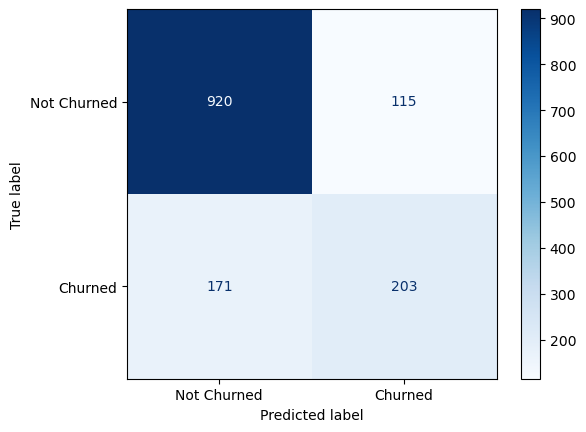

In [ ]:
cm = confusion_matrix(y_test,model.predict(X_test))
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Churned','Churned']).plot(cmap=plt.cm.Blues)

## 4.3. Optimiztion of Hyperparameters using GridSearchCV:

In [ ]:
# param_grid = {
#     'max_depth': [3,4,5], #Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.
#     'learning_rate': [0.1,0.5,1],
#     'gamma': [0.25],
#     'reg_lambda': [10.0,20,100],
#     'scale_pos_weight': [3] #Because of high class imbalance ,by adding penalty to for incorrectly classifying the minority class (People Who Left/Churned), we can improve the performance of the model.
# }
# optimal_params = GridSearchCV(
#     estimator=xgb.XGBClassifier(objective='binary:logistic',seed=42,subsample=0.9,colsample_bytree=0.5),
#     param_grid=param_grid,
#     scoring='roc_auc',
#     verbose=0,
#     n_jobs=10,
#     cv=3
# )
# optimal_params.fit(X_train,y_train,early_stopping_rounds=10,eval_metric='auc',eval_set=[(X_test,y_test)],verbose=False)
# print(optimal_params.best_params_)

## 4.4.1 Building The XGBoost Model With Optimal Hyperparameters :

In [ ]:
model = xgb.XGBClassifier(objective='binary:logistic',seed=42,subsample=0.9,colsample_bytree=0.5,gamma=0.25,max_depth=4,learning_rate=0.1,reg_lambda=10,scale_pos_weight=3)
#missing='None' is used because we have already replaced the missing values with 0.
model.fit(X_train,y_train,verbose=True,early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(X_test,y_test)])

C:\Users\turki\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\turki\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-aucpr:0.58082
[1]	validation_0-aucpr:0.59421
[2]	validation_0-aucpr:0.60934
[3]	validation_0-aucpr:0.61828
[4]	validation_0-aucpr:0.61796
[5]	validation_0-aucpr:0.61900
[6]	validation_0-aucpr:0.61900
[7]	validation_0-aucpr:0.62464
[8]	validation_0-aucpr:0.62964
[9]	validation_0-aucpr:0.62366
[10]	validation_0-aucpr:0.62507
[11]	validation_0-aucpr:0.62588
[12]	validation_0-aucpr:0.64024
[13]	validation_0-aucpr:0.65524
[14]	validation_0-aucpr:0.65389
[15]	validation_0-aucpr:0.65446
[16]	validation_0-aucpr:0.65404
[17]	validation_0-aucpr:0.65668
[18]	validation_0-aucpr:0.65787
[19]	validation_0-aucpr:0.65884
[20]	validation_0-aucpr:0.65645
[21]	validation_0-aucpr:0.65640
[22]	validation_0-aucpr:0.65752
[23]	validation_0-aucpr:0.65596
[24]	validation_0-aucpr:0.65527
[25]	validation_0-aucpr:0.65521
[26]	validation_0-aucpr:0.65377
[27]	validation_0-aucpr:0.65693
[28]	validation_0-aucpr:0.66173
[29]	validation_0-aucpr:0.66079
[30]	validation_0-aucpr:0.65983
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## 4.4.2 Evaluating The XGBoost Model With Optimal Hyperparameters :

In [ ]:
y_pred = model.predict(X_test)
# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1-score
f1 = f1_score(y_test, y_pred)

# AUC-ROC (requires predicted probabilities)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)


# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)
print("Accuracy:", accuracy)

Precision: 0.5057660626029654
Recall: 0.820855614973262
F1-score: 0.6258919469928644
AUC-ROC: 0.8562763181689014
Accuracy: 0.7395315826827538


## 4.4.3 Plotting The Confusion Matrix For The XGBoost Model With Optimal Hyperparameters :

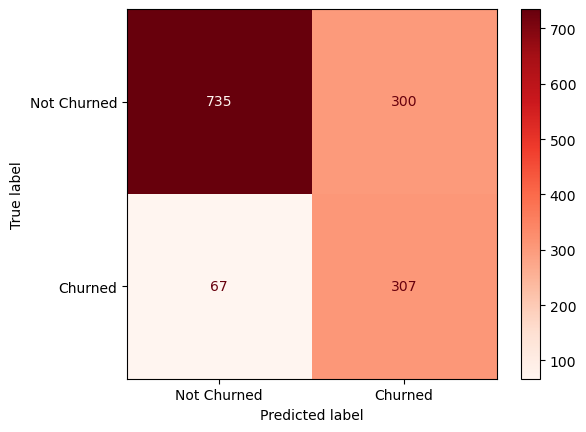

In [ ]:
cm = confusion_matrix(y_test,model.predict(X_test))
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Churned','Churned']).plot(cmap=plt.cm.Reds)